In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [18]:
def linear(x, a, b):
    return a*x + b
def quadratic(x,a,b,c):
    return a*x**2 + b*x + c

# Data analysis

In [39]:
#Load temperature data
t_mean, t_low_conf, t_up_conf = np.loadtxt("HadCRUT.5.0.1.0.analysis.summary_series.global.monthly.csv",
                                            unpack=True, delimiter=",", skiprows=1, usecols=(1,2,3))
t_date = np.loadtxt("HadCRUT.5.0.1.0.analysis.summary_series.global.monthly.csv",
                    unpack=True, delimiter=",", skiprows=1, usecols=0, dtype=str)

#Unpack datestring
t_year  = np.array([])
t_month = np.array([])
for timestr in t_date:
    t_year = np.append(t_year, int(timestr.split("-")[0]))
    t_month = np.append(t_month, int(timestr.split("-")[1]))

#Decadal mean and median
t_dec_mean   = np.array([])
t_dec_median = np.array([])
for i in range(0, len(t_mean[120:])):
    t_dec_mean   = np.append(t_dec_mean, np.mean(t_mean[i:120+i]))
    t_dec_median = np.append(t_dec_median, np.median(t_mean[i:120+i]))

#Fitting (linear fits of decades)
t_popt_array = np.array([])
t_pcov_array = np.array([])
t_fit = np.array([])
for d in range(185,202): #from 1850s to 2010s
    decade = d*10
    mask   = np.logical_and(t_year>=decade, t_year<(decade+10))
    popt, pcov = curve_fit(linear, np.linspace(decade, decade+10, 120, endpoint=False),
                          t_mean[mask]) #Parameter a is then in °C/year
    t_popt_array = np.append(t_popt_array, popt)
    t_pcov_array = np.append(t_pcov_array, pcov)
    t_fit = np.append(t_fit, linear(np.linspace(decade, decade+10, 120, endpoint=False), *popt))
    
#Load CO2 data   
c_mean = np.loadtxt("co2_mm_mlo.txt", usecols=3)
c_year, c_month = np.loadtxt("co2_mm_mlo.txt", usecols=(0,1), unpack=True, dtype=int)

#Create datestring
c_date = np.array([])
for i in range(0, len(c_mean)):
    c_date = np.append(c_date, "{0:4d}-{1:02d}".format(c_year[i], c_month[i]))

#Decadal mean and median
c_dec_mean   = np.array([])
c_dec_median = np.array([])
for i in range(0, len(c_mean[120:])):
    c_dec_mean   = np.append(c_dec_mean, np.mean(c_mean[i:120+i]))
    c_dec_median = np.append(c_dec_median, np.median(c_mean[i:120+i]))
    
#Fitting (linear fits of decades)
c_popt_array = np.array([])
c_pcov_array = np.array([])
c_fit = np.array([])
for d in range(196,202): #from 1960s-2010s 
    decade = d*10
    mask   = np.logical_and(c_year>=decade, c_year<decade+10)
    popt, pcov = curve_fit(linear, np.linspace(decade, decade+10, 120, endpoint=False),
                           c_mean[mask]) #Parameter a is then in °C/year
    c_popt_array = np.append(c_popt_array, popt)
    c_pcov_array = np.append(c_pcov_array, pcov)
    c_fit = np.append(c_fit, linear(np.linspace(decade, decade+10, 120, endpoint=False), *popt))

#Print out grow rates
#Temperature
print("\nAnnual grow rate of temperature in the decades")
print("(obtained from decadal linear fits)")
dec = 1850
for a in t_popt_array[::2]:
    print("{0:d}s: {1:9f} ppm/yr".format(dec, a))
    dec=dec+10
    
#CO2
print("\nAnnual grow rate of CO2 concentration in the decades")
print("(obtained from decadal linear fits)")
dec = 1960
for a in c_popt_array[::2]:
    print("{0:d}s: {1:9f} °C/yr".format(dec, a))
    dec=dec+10

#Quadratic Fit to predict 2050
#We do a quadratic fit for all data from 1970 on

#Temperature
mask = t_year >= 1970
t_predict_popt, t_predict_pcov = curve_fit(quadratic, t_year[mask] + t_month[mask]/12, t_mean[mask])
print("\nTemperature prediction for year 2050: {0:0.1f} °C higher than average 1961-1990".format(quadratic(2050, *t_predict_popt)))
print("(using quadratic fit for the data from 1970 on)")


Annual grow rate of temperature in the decades
(obtained from decadal linear fits)
1850s: -0.006184 ppm/yr
1860s:  0.014405 ppm/yr
1870s:  0.021828 ppm/yr
1880s: -0.009696 ppm/yr
1890s:  0.017780 ppm/yr
1900s: -0.022225 ppm/yr
1910s:  0.015747 ppm/yr
1920s:  0.004409 ppm/yr
1930s:  0.019005 ppm/yr
1940s: -0.024541 ppm/yr
1950s:  0.003742 ppm/yr
1960s: -0.003890 ppm/yr
1970s:  0.020147 ppm/yr
1980s:  0.003682 ppm/yr
1990s:  0.018816 ppm/yr
2000s:  0.016271 ppm/yr
2010s:  0.035353 ppm/yr

Annual grow rate of CO2 concentration in the decades
(obtained from decadal linear fits)
1960s:  0.767081 °C/yr
1970s:  1.192464 °C/yr
1980s:  1.559946 °C/yr
1990s:  1.525992 °C/yr
2000s:  1.989682 °C/yr
2010s:  2.378256 °C/yr

Temperature prediction for year 2050: 1.5 °C higher than average 1961-1990
(using quadratic fit for the data from 1970 on)


# Plots

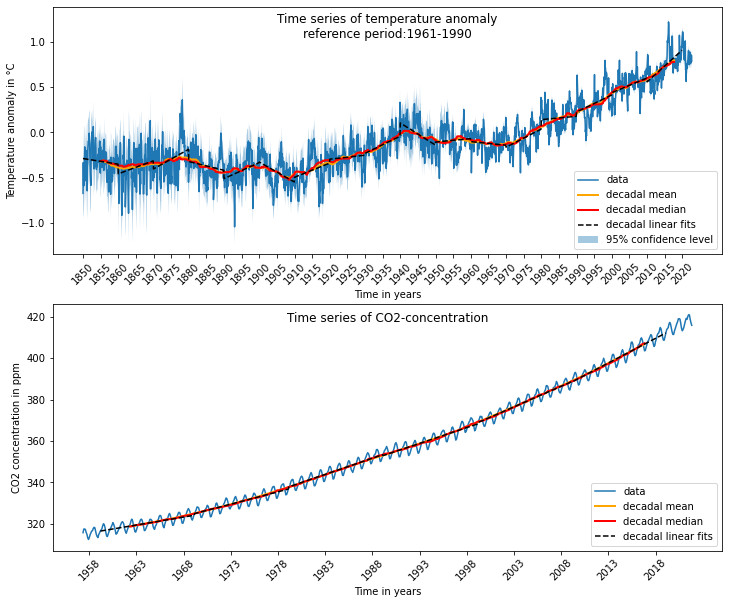

In [4]:
#Plot
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(211)
x = np.linspace(0,len(t_mean), len(t_mean))
ax.set_xticks(x[::60])
ax.set_xticklabels(t_year[::60].astype(int), rotation=45)
ax.plot(x, t_mean, label="data")
ax.fill_between(x, t_up_conf, t_low_conf, alpha=0.4, label="95% confidence level")
ax.plot(x[60:-60], t_dec_mean, linewidth=2, color="orange", label="decadal mean")
ax.plot(x[60:-60], t_dec_median, linewidth=2, color="red", label="decadal median")
#decadal mean/median plotted at time t is mean/median of period (t-5yr, t+5yr)
ax.plot(x[np.logical_and(t_year>=1850, t_year<2020)], t_fit, ls="--", color="black", label="decadal linear fits") #Fits

ax.set_title("Time series of temperature anomaly\nreference period:1961-1990", y=0.85)
ax.set_ylabel("Temperature anomaly in °C")
ax.set_xlabel("Time in years")
ax.legend(loc="lower right")

#Plot
ax2 = fig.add_subplot(212)
x = np.linspace(0,len(c_mean), len(c_mean))
ax2.set_xticks(x[8::60])
ax2.set_xticklabels(c_year[8::60], rotation=45)
ax2.plot(x, c_mean, label="data")
ax2.plot(x[60:-60], c_dec_mean, linewidth=2, color="orange", label="decadal mean")
ax2.plot(x[60:-60], c_dec_median, linewidth=2, color="red", label="decadal median")
#decadal mean/median plotted at time t is mean/median of period (t-5yr, t+5yr)
ax2.plot(x[np.logical_and(c_year>=1960, c_year<2020)], c_fit, ls="--", color="black", label="decadal linear fits") #Fits
ax2.set_title("Time series of CO2-concentration", y=0.9)
ax2.set_ylabel("CO2 concentration in ppm")
ax2.set_xlabel("Time in years")
ax2.legend(loc="lower right")

Temperature: Decaddal mean (and median) show an increasing trend (since the ~1970s), the slope is becoming steeper.


CO2: Decadal mean (and median) of CO2 show an increasing trend

### Andere Darstellung (alle in einem)